# Importing libraries

In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\shlomias\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
import numpy as np
import time
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, log_loss, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
X = np.load('data/cifar10_features.npy')
Y = np.load('data/cifar10_labels.npy')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Feature Shape:", X.shape)
print("Label Shape:", Y.shape)
print("Example Features:", X[:5])
print("Example Labels:", Y[:5])

Feature Shape: (50000, 16)
Label Shape: (50000,)
Example Features: [[-10.316492    -9.219499     5.6836095   10.560703    -7.8908167
   -5.444539   -13.386533     8.584426     1.2373098    2.620596
   11.018443    -4.2349334    5.0958567    6.3705587   -1.8090839
    7.2225003 ]
 [  7.481172     6.139558     3.3403616    0.08668663  -0.77877134
   -8.864485    -6.7062845   -1.0690573    4.9872813    1.6038104
    6.423094    -0.7426312    2.5941138  -10.134348     4.1819096
    0.21896511]
 [ 11.439068     6.9961743    0.52943176   4.803377    -2.0376425
  -13.85577     -5.317335     2.1301713   11.248181     6.665526
   15.688234    -4.421451     3.9242096  -13.232056     1.9560468
    1.4480063 ]
 [ -0.20259686  -1.2906628    2.8221395    7.9919014   -5.1371694
    8.211122     4.824665    -2.3066144   -5.748542    -1.8008168
  -14.819701   -11.07256      1.9884455   -3.4726849   10.8494835
   -9.39806   ]
 [ -4.3365293   -6.5237374    6.6791663   -3.4806645    5.330081
   -7.8313446

## function for test

In [3]:
def testmymodel(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# One-vs-All model training

אחד נגד כולם זה שיטה שמתאימה רגרסיה לוגיסטית ליותר מ-2 מחלקות שהרי רגרסיה לוגיסטית נועדה לסיווג ביניארי

In [ ]:
class MyOVAClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.models = [] 
        
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.models = []
        for c in self.classes_:
            y_binary = (y == c).astype(int)
            model = LogisticRegression(solver='lbfgs', max_iter=1000)
            model.fit(X, y_binary)
            self.models.append(model)
        return self

    def predict(self, X):
        probas = np.array([model.predict_proba(X)[:, 1] for model in self.models])
        return np.argmax(probas, axis=0)

    def predict_proba(self, X):
        probas = np.array([model.predict_proba(X)[:, 1] for model in self.models]).T
        return probas 
    
    def get_params(self, deep=True):
        return {}

    def set_params(self, **params):
        return self

In [14]:
model_ova_custom = MyOVAClassifier()

start_time = time.time()
model_ova_custom.fit(X_train, y_train)
ova_time = time.time() - start_time

y_pred = model_ova_custom.predict(X_test)
y_proba = model_ova_custom.predict_proba(X_test)

ova_acc = testmymodel(model_ova_custom, X_test, y_test)
ova_f1 = f1_score(y_test, y_pred, average='macro')
ova_loss = log_loss(y_test, y_proba)

print(f"OVA Accuracy: {ova_acc:.4f}")
print(f"OVA F1-mean: {ova_f1:.4f}")
print(f"OVA Log Loss: {ova_loss:.4f}")
print(f"OVA Training Time: {ova_time:.2f} seconds")


OVA Accuracy: 0.9610
OVA F1-mean: 0.9612
OVA Log Loss: 0.1581
OVA Training Time: 2.15 seconds


C:\Users\shlomias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


# Softmax model training

In [24]:
# Logistic Regression - Softmax
model_softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

start_time = time.time()
model_softmax.fit(X_train, y_train)
softmax_time = time.time() - start_time

softmax_acc = testmymodel(model_softmax, X_test, y_test)
softmax_f1 = f1_score(y_test, model_softmax.predict(X_test), average='macro')
softmax_loss = log_loss(y_test, model_softmax.predict_proba(X_test))

print(f"Softmax Accuracy: {softmax_acc:.4f}")
print(f"Softmax F1-mean: {softmax_f1:.4f}")
print(f"Softmax Log Loss: {softmax_loss:.4f}")
print(f"Softmax Training Time: {softmax_time:.2f} seconds")


C:\Users\shlomias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Softmax Accuracy: 0.9629
Softmax F1-mean: 0.9632
Softmax Log Loss: 0.1077
Softmax Training Time: 1.63 seconds


## Confusion Matrix for One-vs-All

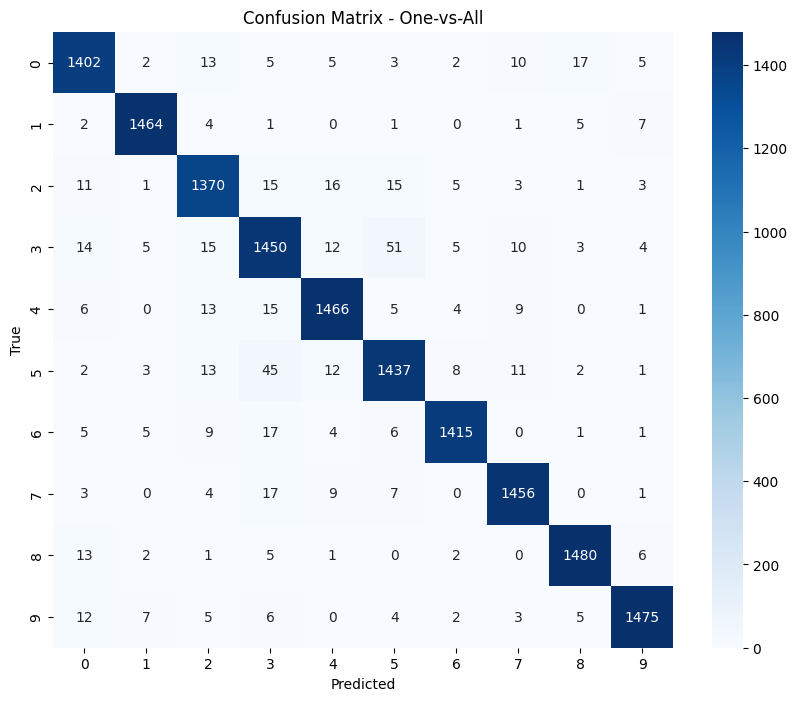

In [15]:
y_pred_ova = model_ova_custom.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ova)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - One-vs-All')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Class 3 still makes a lot of mistakes vs. Class 5 - 51 mistakes

Class 5 makes mistakes again vs. Class 3 - 45 mistakes

Classes 3 and 5 are a problematic pair and the model has difficulty distinguishing between them (in our case, it's a Class 3 cat vs. a Class 5 dog)

A new binary classifier model was built that only distinguishes between them

In [17]:
# Filter classes 3 and 5 only
selected_classes = [3, 5]

train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

X_train_2 = X_train[train_mask]
y_train_2 = y_train[train_mask]
X_test_2 = X_test[test_mask]
y_test_2 = y_test[test_mask]

# Building the new model
model_2classes = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model_2classes.fit(X_train_2, y_train_2)

# test
acc_2classes = testmymodel(model_2classes, X_test_2, y_test_2)
f1_2classes = f1_score(y_test_2, model_2classes.predict(X_test_2), average='macro')
loss_2classes = log_loss(y_test_2, model_2classes.predict_proba(X_test_2))

print(f"Accuracy for Class 3 vs 5 Model: {acc_2classes:.4f}")
print(f"F1 Score for Class 3 vs 5 Model: {f1_2classes:.4f}")
print(f"Loss for Class 3 vs 5 Model: {loss_2classes:.4f}")


Accuracy for Class 3 vs 5 Model: 0.9623
F1 Score for Class 3 vs 5 Model: 0.9623
Loss for Class 3 vs 5 Model: 0.0968


C:\Users\shlomias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 600x500 with 0 Axes>

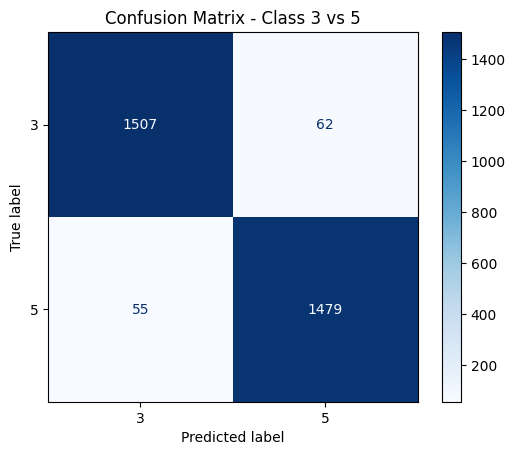

In [22]:
y_pred_2 = model_2classes.predict(X_test_2)

cm = confusion_matrix(y_test_2, y_pred_2, labels=[3, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[3, 5])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Class 3 vs 5")
plt.grid(False)
plt.show()

<Figure size 600x500 with 0 Axes>

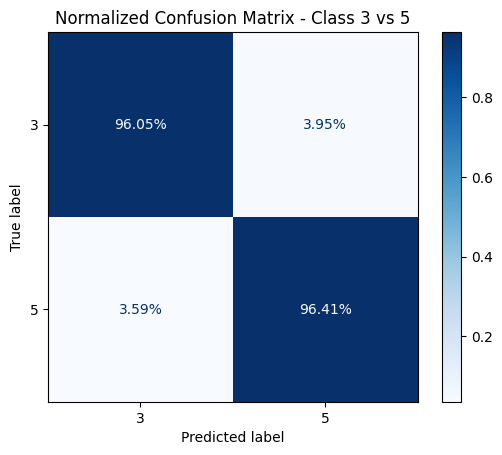

In [23]:
cm_norm = confusion_matrix(y_test_2, y_pred_2, labels=[3, 5], normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=[3, 5])
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format=".2%")
plt.title("Normalized Confusion Matrix - Class 3 vs 5")
plt.grid(False)
plt.show()

## Integrated prediction function with auxiliary model

Runs the main model and if there is confusion between class 3 and class 5 then it runs the binary auxiliary model

In [34]:
def predict_with_helper(main_model, helper_model, X_test, y_test):
    main_preds = main_model.predict(X_test)
    mask = np.logical_or(
        (main_preds == 3) & (y_test == 5),
        (main_preds == 5) & (y_test == 3)
    )
    if np.any(mask):
        helper_preds = helper_model.predict(X_test[mask])
        main_preds[mask] = helper_preds
    return main_preds


# Combination

In [39]:
# Normal forecast (for testing)
y_pred_main = model_ova_custom.predict(X_test)

# Combined forecast with improvement for departments 3 and 5
y_pred_combined = predict_with_helper(model_ova_custom, model_2classes, X_test, y_test)

acc_before = accuracy_score(y_test, y_pred_main)
acc_after = accuracy_score(y_test, y_pred_combined)

f1_before = f1_score(y_test, y_pred_main, average='macro')
f1_after = f1_score(y_test, y_pred_combined, average='macro')

print(f"Accuracy before using helper model: {acc_before:.4f}")
print(f"Accuracy after using helper model: {acc_after:.4f}")
print(f"F1-mean before: {f1_before:.4f}")
print(f"F1-mean after: {f1_after:.4f}")

Accuracy before using helper model: 0.9610
Accuracy after using helper model: 0.9615
F1-mean before: 0.9612
F1-mean after: 0.9617


The results improved slightly, but because the binary model also has a few errors, it could not improve 100 percent.

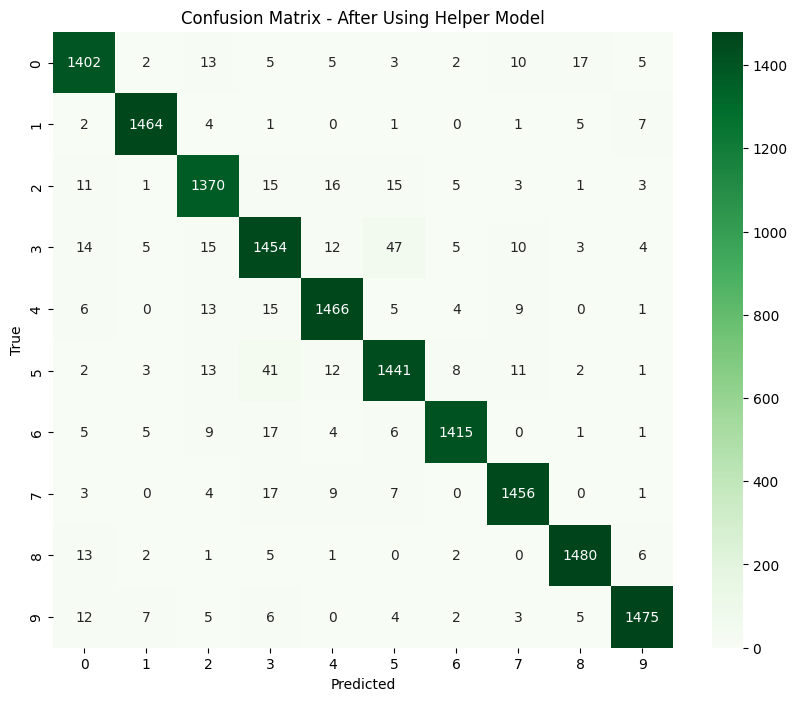

In [40]:
cm_after = confusion_matrix(y_test, y_pred_combined)

plt.figure(figsize=(10,8))
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - After Using Helper Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

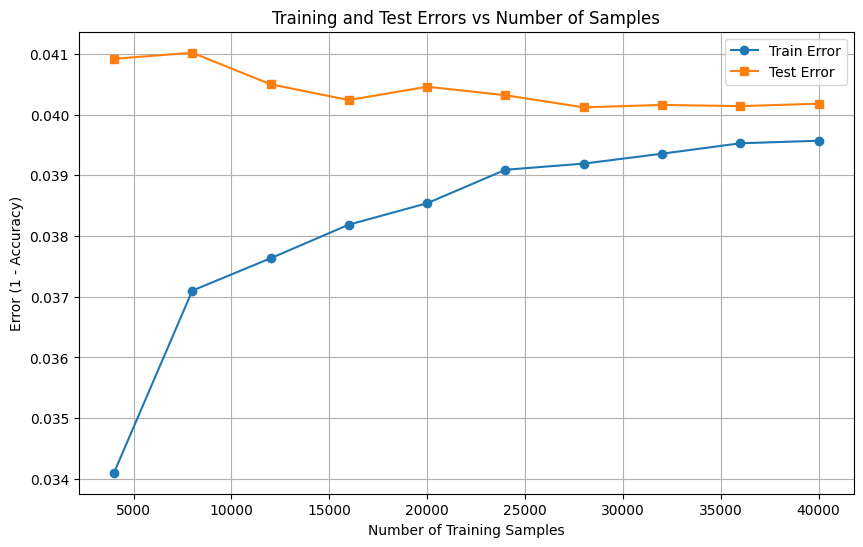

In [41]:

train_sizes, train_scores, test_scores = learning_curve(
    model_ova_custom, X, Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

train_errors = 1 - np.mean(train_scores, axis=1)
test_errors = 1 - np.mean(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_errors, label='Train Error', marker='o')
plt.plot(train_sizes, test_errors, label='Test Error', marker='s')
plt.xlabel('Number of Training Samples')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Training and Test Errors vs Number of Samples')
plt.legend()
plt.grid(True)
plt.show()


- There is no overfitting, as we see that the error on the test and training is quite similar and low
- There is no underfitting, as we see that the errors are low and there is no gap between them

## Performance Comparison Between One-vs-All and Softmax

In One-vs-All it came out:
- One-vs-All Accuracy: 0.9610
- One-vs-All F1-mean: 0.9612
- One-vs-All Log Loss: 0.1581
- One-vs-All Training Time: 2.15 seconds

In Softmax it came out:
- Softmax Accuracy: 0.9629
- Softmax F1-mean: 0.9632
- Softmax Log Loss: 0.1077
- Softmax Training Time: 1.63 seconds

### Analysis:
- Softmax achieved higher accuracy than One-vs-All, both in the F1 and Log Loss metrics.
- Softmax training time was longer, but still reasonable (about 2.44 seconds).
- Overall Softmax performed better in terms of model quality.

## Auxiliary model for classes 3 and 5

In the confusion matrix we saw that there is a relatively high confusion between classes 3 and 5.
Therefore, we built a dedicated model that only classifies between these two classes.

### Model performance:

- Accuracy: 0.9623
- F1-mean: 0.9623
- Log Loss: 0.0968

## Integrating the auxiliary model into the main model

We tried to improve the predictions of the main One-vs-All model using the auxiliary model, so that in cases where a prediction of class 3 or 5 was obtained, we would use the special model.

### Results:
Before improvement:
- Accuracy: 0.9610
- F1 Score: 0.9612

After improvement:
- Accuracy: 0.9612
- F1 Score: 0.9617

### Conclusion:
- No significant improvement was observed following the use of the auxiliary model.
- It is possible that the main model already made good predictions for classes 3 and 5.
- The amount of initial errors was relatively small, so the correction did not lead to a large improvement.